<a href="https://colab.research.google.com/github/pitfisher/miem_face_recognition/blob/main/visualization_ver_res.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ver_results = '/content/drive/MyDrive/res_visualization/verification_results.csv'
rotated_results = '/content/drive/MyDrive/res_visualization/rotated_verification_results.csv'
df = pd.read_csv(ver_results)
df_rot = pd.read_csv(rotated_results)

In [ ]:
df['resolution'] = df['file_name'].str.extract(r'_(\d+)x\d+\.jpg').astype(int)
df_rot['resolution'] = df_rot['file_name'].str.extract(r'_(\d+)x\d+\.jpg').astype(int)

In [ ]:
columns_to_drop = ['model',	'detector',	'metric', 'reference_image']
df = df.drop(columns=columns_to_drop)
df_rot = df_rot.drop(columns=columns_to_drop)

In [ ]:
df, df_rot

(                    file_name  verified  distance  \
 0    adpiskunov_1024x1024.jpg      True   0.08428   
 1      adpiskunov_112x112.jpg      True   0.27132   
 2      adpiskunov_128x128.jpg      True   0.20090   
 3      adpiskunov_224x224.jpg      True   0.11563   
 4      adpiskunov_256x256.jpg      True   0.15089   
 ..                        ...       ...       ...   
 114    vyunastasova_32x32.jpg     False   0.88166   
 115  vyunastasova_512x512.jpg      True   0.17105   
 116    vyunastasova_64x64.jpg      True   0.77861   
 117  vyunastasova_768x768.jpg      True   0.15546   
 118    vyunastasova_96x96.jpg      True   0.57422   
 
                                                 height  resolution  
 0    {'img1': {'x': 323, 'y': 185, 'w': 394, 'h': 5...        1024  
 1    {'img1': {'x': 35, 'y': 20, 'w': 43, 'h': 63},...         112  
 2    {'img1': {'x': 39, 'y': 23, 'w': 50, 'h': 72},...         128  
 3    {'img1': {'x': 71, 'y': 39, 'w': 86, 'h': 128}...         224  


<ipython-input-15-499d083519cd>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('resolution').mean()


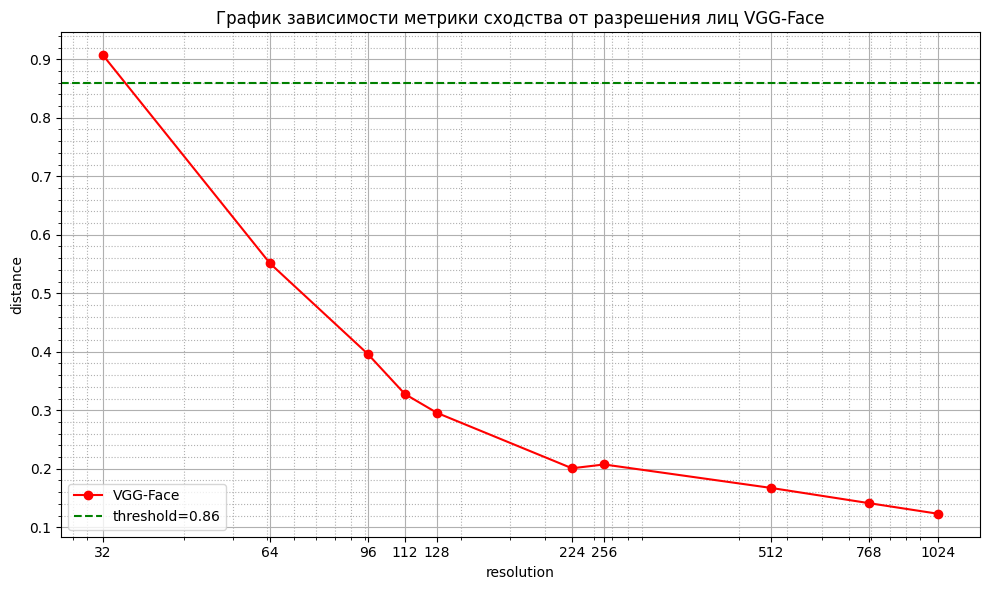

In [ ]:
plt.figure(figsize=(10, 6))

grouped_data = df.groupby('resolution').mean()
plt.plot(grouped_data.index ** 2, grouped_data['distance'], marker='o', color='r', label='VGG-Face')

#grouped_data_rot = df_rot.groupby('resolution').mean()
#plt.plot(grouped_data_rot.index ** 2, grouped_data_rot['distance'], marker='o', color='b', label='aligned')

plt.axhline(y=0.86, color='green', linestyle='--', label='threshold=0.86')
plt.xscale('log')

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.title('График зависимости метрики сходства от разрешения лиц VGG-Face')
plt.xlabel('resolution')
plt.ylabel('distance')
plt.xticks(grouped_data.index ** 2, grouped_data.index)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df['face_height'] = df['height'].apply(lambda x: ast.literal_eval(x.replace("'", "\""))['img1']['h'])

In [ ]:
correlation_coefficient = df['face_height'].corr(df['distance'])
print(f"Коэффициент Пирсона: {correlation_coefficient}")

Коэффициент Пирсона: -0.6119532697916906


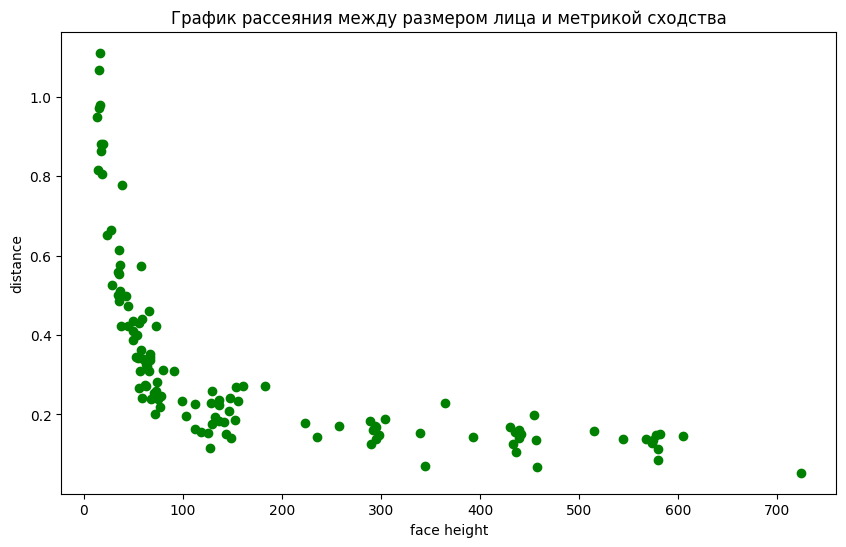

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['face_height'], df['distance'], color='g')
plt.title('График рассеяния между размером лица и метрикой сходства')
plt.xlabel('face height')
plt.ylabel('distance')
plt.show()

In [ ]:
df

,file_name,verified,distance,height,resolution,face_height
0,adpiskunov_1024x1024.jpg,True,0.08428,"{'img1': {'x': 323, 'y': 185, 'w': 394, 'h': 5...",1024,580
1,adpiskunov_112x112.jpg,True,0.27132,"{'img1': {'x': 35, 'y': 20, 'w': 43, 'h': 63},...",112,63
2,adpiskunov_128x128.jpg,True,0.20090,"{'img1': {'x': 39, 'y': 23, 'w': 50, 'h': 72},...",128,72
3,adpiskunov_224x224.jpg,True,0.11563,"{'img1': {'x': 71, 'y': 39, 'w': 86, 'h': 128}...",224,128
4,adpiskunov_256x256.jpg,True,0.15089,"{'img1': {'x': 80, 'y': 46, 'w': 98, 'h': 144}...",256,144
...,...,...,...,...,...,...
114,vyunastasova_32x32.jpg,False,0.88166,"{'img1': {'x': 8, 'y': 5, 'w': 15, 'h': 20}, '...",32,20
115,vyunastasova_512x512.jpg,True,0.17105,"{'img1': {'x': 131, 'y': 99, 'w': 235, 'h': 29...",512,294
116,vyunastasova_64x64.jpg,True,0.77861,"{'img1': {'x': 16, 'y': 11, 'w': 30, 'h': 39},...",64,39
117,vyunastasova_768x768.jpg,True,0.15546,"{'img1': {'x': 202, 'y': 153, 'w': 347, 'h': 4...",768,435


In [ ]:
df_rot

,file_name,verified,distance,height,resolution
0,rotated_adpiskunov_1024x1024.jpg,True,0.12662,"{'img1': {'x': 320, 'y': 181, 'w': 397, 'h': 5...",1024
1,rotated_adpiskunov_112x112.jpg,True,0.21451,"{'img1': {'x': 35, 'y': 21, 'w': 43, 'h': 61},...",112
2,rotated_adpiskunov_128x128.jpg,True,0.21833,"{'img1': {'x': 40, 'y': 24, 'w': 48, 'h': 70},...",128
3,rotated_adpiskunov_224x224.jpg,True,0.19541,"{'img1': {'x': 70, 'y': 41, 'w': 85, 'h': 126}...",224
4,rotated_adpiskunov_256x256.jpg,True,0.15635,"{'img1': {'x': 80, 'y': 47, 'w': 98, 'h': 143}...",256
...,...,...,...,...,...
95,rotated_vyunastasova_32x32.jpg,True,0.85553,"{'img1': {'x': 8, 'y': 6, 'w': 15, 'h': 19}, '...",32
96,rotated_vyunastasova_512x512.jpg,True,0.13825,"{'img1': {'x': 132, 'y': 100, 'w': 234, 'h': 2...",512
97,rotated_vyunastasova_64x64.jpg,True,0.78733,"{'img1': {'x': 16, 'y': 11, 'w': 30, 'h': 39},...",64
98,rotated_vyunastasova_768x768.jpg,True,0.11890,"{'img1': {'x': 202, 'y': 153, 'w': 346, 'h': 4...",768


In [ ]:
df_center_path = '/content/drive/MyDrive/face_dataset/results/center_center_csv/Копия 224_comparison_results.csv'
df_center = pd.read_csv(df_center_path)

In [ ]:
df_center

,img_1,img_2,distance,verified
0,drsmirnov_glasses_224.jpg,drsmirnov_glasses_224.jpg,0.000000,True
1,drsmirnov_glasses_224.jpg,drsmirnov_no_glasses_224.jpg,0.937964,True
2,drsmirnov_glasses_224.jpg,kdfrolov_no_glasses_224.jpg,1.205719,False
3,drsmirnov_glasses_224.jpg,dmbobrova_no_glasses_224.jpg,1.284691,False
4,drsmirnov_glasses_224.jpg,isulanova_no_glasses_224.jpg,1.263826,False
...,...,...,...,...
436,arkhabibullina_3_no_glasses_224.jpg,avpapina_no_glasses_224.jpg,1.228655,False
437,arkhabibullina_3_no_glasses_224.jpg,ayuvasileva_1_no_glasses_224.jpg,1.274024,False
438,arkhabibullina_3_no_glasses_224.jpg,asbaranova_glasses_224.jpg,1.354121,False
439,arkhabibullina_3_no_glasses_224.jpg,asbaranova_no_glasses_224.jpg,1.279651,False


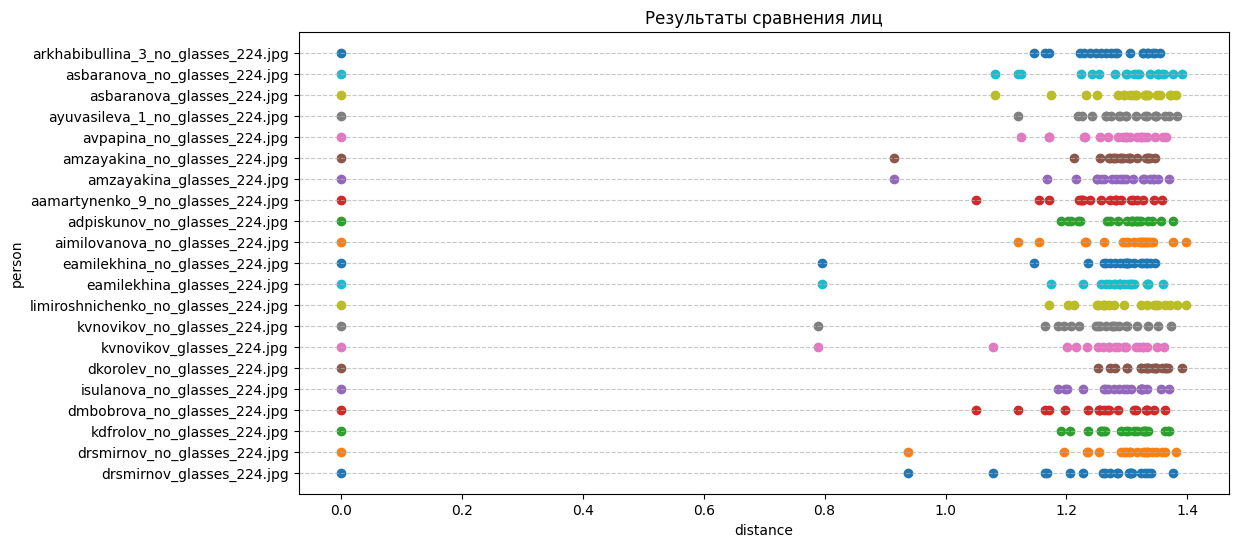

In [ ]:
uniq_people = df_center['img_1'].unique()
plt.figure(figsize=(12, 6))

for person in uniq_people:

    person_data = df_center[df_center['img_1'] == person]
    plt.scatter(person_data['distance'], [person] * len(person_data), marker='o', label=person)

plt.title('Результаты сравнения лиц')
plt.xlabel('distance')
plt.yticks(uniq_people)
plt.ylabel('person')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()